In [200]:
import pandas as pd
import seaborn as sns
import math
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

pd.set_option('display.max_columns', None, 'display.max_rows', None)
%matplotlib inline

In [11]:
df = pd.read_csv('../datasets/clean_train_data.csv')

In [12]:
test= pd.read_csv('../datasets/clean_test_data.csv')

In [13]:
# why am i still seing all these nulls if i imported my cleaned data
#print(df.isnull().sum().to_string())

### Simple way to look at what features to use for my model 

In [228]:
df.corr()['SalePrice'].sort_values(ascending=False)[:15]

SalePrice         1.000000
Overall Qual      0.797464
totalLivingSF     0.781502
Gr Liv Area       0.695185
Garage Area       0.648543
Garage Cars       0.645511
Total Bsmt SF     0.624153
1st Flr SF        0.616027
Year Built        0.564084
Year Remod/Add    0.542661
Full Bath         0.532360
Mas Vnr Area      0.501554
TotRms AbvGrd     0.501306
Fireplaces        0.464654
BsmtFin SF 1      0.419112
Name: SalePrice, dtype: float64

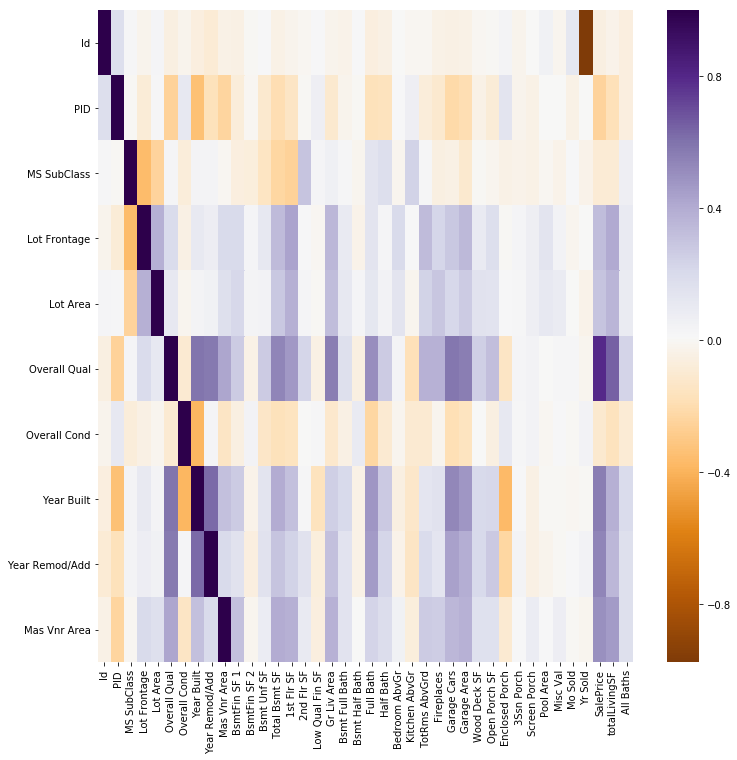

In [222]:
fig, ax = plt.subplots(figsize=(12,12))
corr_matrix=df.corr()[:10]
sns.heatmap(corr_matrix, cmap='PuOr')

In [203]:
df['BsmtFin SF 1'].fillna(0, inplace=True)
df['BsmtFin SF 2'].fillna(0, inplace=True)
df['Bsmt Unf SF'].fillna(0, inplace=True)                           
df['Total Bsmt SF'].fillna(0, inplace=True)
df['Bsmt Full Bath'].fillna(0, inplace=True)                           

### Looking at sale price 

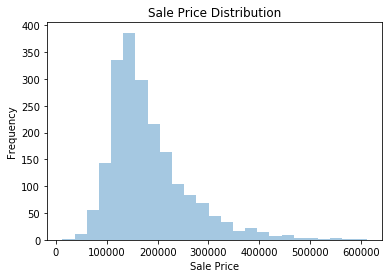

In [99]:
sns.distplot(df.SalePrice, kde=False, bins=25, axlabel='Sale Price')
plt.title('Sale Price Distribution')
plt.ylabel('Frequency');

In [15]:
#df['Fireplace Qu'].fillna('None', inplace=True)
df['Fireplace Qu'].value_counts()

None    977
Gd      523
TA      407
Fa       59
Po       31
Ex       31
Name: Fireplace Qu, dtype: int64

### #Excellent fire place has a good sale price, but theres only 31 homes, most of them are in the fa

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


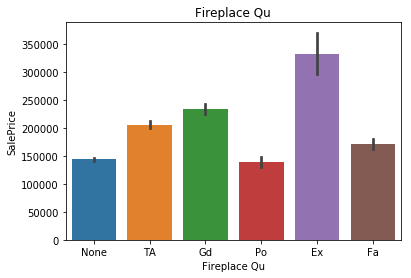

In [234]:
sns.barplot(df['Fireplace Qu'],df['SalePrice'])
plt.title('Fireplace Qu');

In [17]:
df[['Fireplaces', 'SalePrice']].corr()

,Fireplaces,SalePrice
Fireplaces,1.000000,0.464654
SalePrice,0.464654,1.000000


In [18]:
#had to remove 
df['MS Zoning'].value_counts()

RL    1598
RM     315
FV     101
RH      14
Name: MS Zoning, dtype: int64

In [19]:
nonResidential = ('C (all)', 'A (agr)','I (all)' )

for each in nonResidential:
    df= df[df['MS Zoning']!=each]
    print(each)

C (all)
A (agr)
I (all)


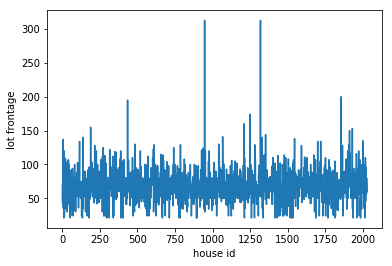

In [20]:
# outliers.... not sure if theyre a typo or real.. just leave em 
plt.plot(df['Lot Frontage'])
plt.xlabel('house id')
plt.ylabel('lot frontage');

In [21]:
df[df['Lot Frontage'] >250]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,totalLivingSF
947,1499,908154235,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,...,0,0,0,480,0,1,2008,New,160000,11752.0
1319,1266,535427070,20,RL,313.0,27650,Pave,IR2,HLS,AllPub,...,0,0,0,0,0,11,2008,WD,242000,2654.0


In [22]:
df[['Full Bath','Half Bath','SalePrice']].corr()

,Full Bath,Half Bath,SalePrice
Full Bath,1.000000,0.149903,0.532360
Half Bath,0.149903,1.000000,0.278185
SalePrice,0.532360,0.278185,1.000000


In [23]:
df['totalLivingSF'] = df['Gr Liv Area'] + df['Total Bsmt SF'] + df['Screen Porch'] - df['Low Qual Fin SF']

In [24]:
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,totalLivingSF
0,109,533352170,60,RL,69.0483,13517,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,3,2010,WD,130500,2204.0
1,544,531379050,60,RL,43.0000,11492,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,4,2009,WD,220000,3035.0
2,153,535304180,20,RL,68.0000,7922,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,1,2010,WD,109000,2114.0
3,318,916386060,60,RL,73.0000,9802,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2010,WD,174000,1828.0
4,255,906425045,50,RL,82.0000,14235,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,3,2010,WD,138500,2121.0


In [25]:
df[['Gr Liv Area','Total Bsmt SF','Screen Porch','SalePrice']].corr()

,Gr Liv Area,Total Bsmt SF,Screen Porch,SalePrice
Gr Liv Area,1.000000,0.449197,0.100104,0.695185
Total Bsmt SF,0.449197,1.000000,0.073257,0.623746
Screen Porch,0.100104,0.073257,1.000000,0.131806
SalePrice,0.695185,0.623746,0.131806,1.000000


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


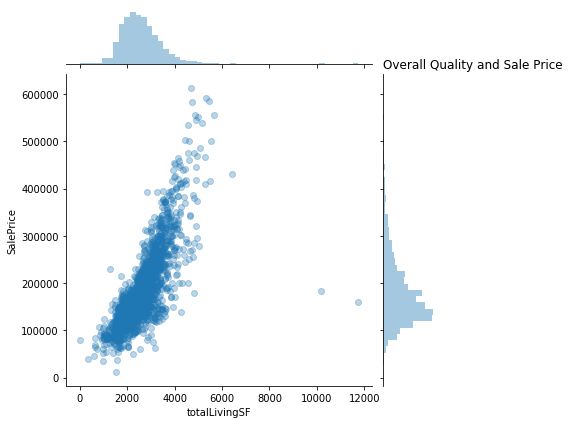

In [300]:
# shows a linear and my crazy outliers.
sns.jointplot(df['Overall Qual'], df['SalePrice'], alpha=.3)
plt.title('Overall Quality and Sale Price', loc='left');

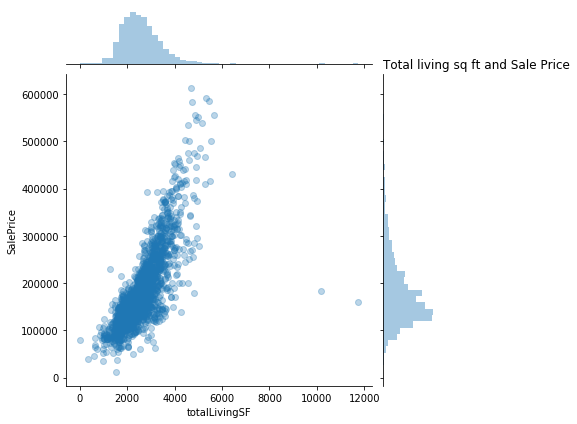

In [302]:
sns.jointplot(df['totalLivingSF'], df['SalePrice'], alpha=.3)
plt.title('Total living sq ft and Sale Price', loc='left');

In [27]:
df[df['totalLivingSF'] > 8000]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,totalLivingSF
947,1499,908154235,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,...,0,0,0,480,0,1,2008,New,160000,11752.0
1865,2181,908154195,20,RL,128.0,39290,Pave,IR1,Bnk,AllPub,...,0,0,0,0,17000,10,2007,New,183850,10190.0


In [55]:
# mean price per hood
#df.groupby('Neighborhood', as_index=True)['SalePrice'].mean()

In [110]:
# grnHill hood has the highest pricing per sq ft, min is IDOTRR
(df.groupby('Neighborhood', as_index=True)['SalePrice'].mean()  / 
df.groupby('Neighborhood', as_index=True)['totalLivingSF'].mean())

Neighborhood
Blmngtn     72.635438
Blueste     73.440014
BrDale      64.317058
BrkSide     61.896671
ClearCr     72.297650
CollgCr     75.834869
Crawfor     74.040801
Edwards     58.044904
Gilbert     75.630590
Greens      76.943991
GrnHill    130.262852
IDOTRR      56.170538
Landmrk     70.256410
MeadowV     57.469301
Mitchel     68.262123
NAmes       62.127664
NPkVill     63.591095
NWAmes      64.865552
NoRidge     81.384949
NridgHt     89.870997
OldTown     56.314980
SWISU       57.604649
Sawyer      65.126908
SawyerW     70.610936
Somerst     82.216767
StoneBr     92.728240
Timber      79.552714
Veenker     76.457964
dtype: float64

In [93]:
x= (df.groupby('Neighborhood', as_index=True)['SalePrice'].mean()) 

In [94]:
tot=(df.groupby('Neighborhood', as_index=True)['totalLivingSF'].mean())

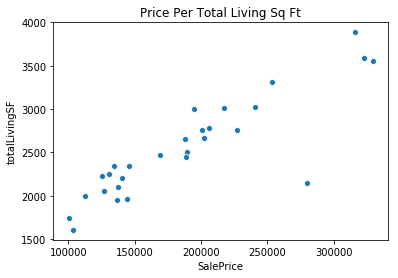

In [108]:
sns.scatterplot(x,tot)
plt.title('Price Per Total Living Sq Ft');

In [30]:
# sq_ft_dict = dict(zip(df.groupby('Neighborhood', as_index=True)['SalePrice'].mean().index,
# df.groupby('Neighborhood', as_index=True)['SalePrice'].mean().values))

In [31]:
#df.groupby('Neighborhood', as_index=True)['SalePrice'].mean().values

In [32]:
#df.groupby('Neighborhood', as_index=True)['SalePrice'].mean().index

In [33]:
#sq_ft_dict

In [34]:
#[sq_ft_dict[each] for each in test['Neighborhood']]

In [35]:
#[sq_ft_dict[each] for each in df['Neighborhood']]

In [36]:
# trying to create so interaction columns
df['All Baths'] = df['Bsmt Full Bath'] * df['Full Bath'] * df['Half Bath']

In [37]:
df['Kitchen Qual'].value_counts()

TA    1030
Gd     804
Ex     151
Fa      43
Name: Kitchen Qual, dtype: int64

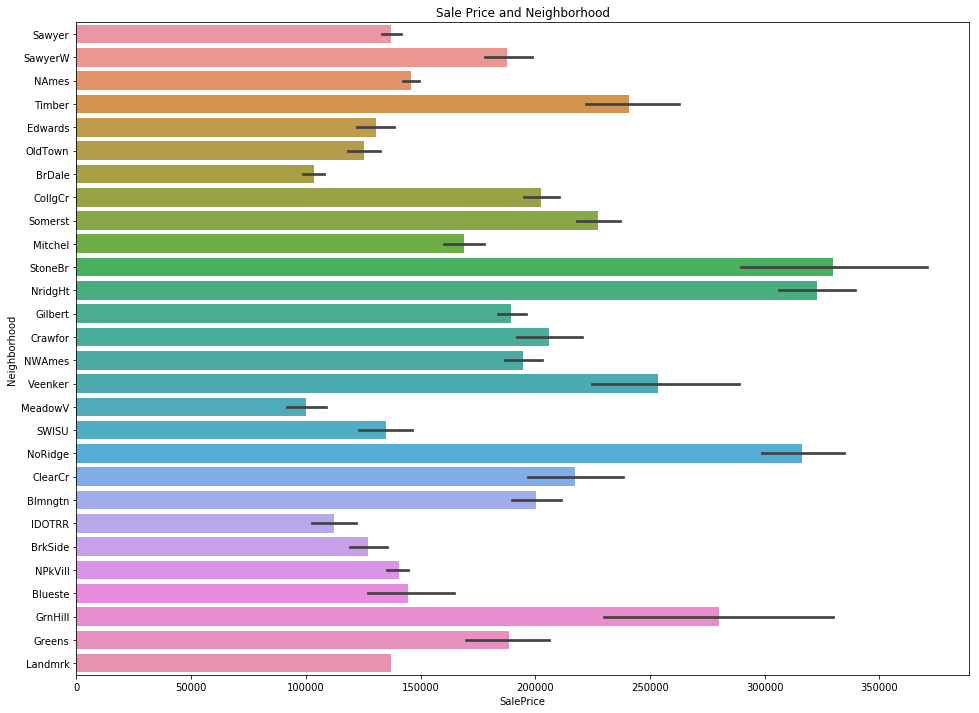

In [303]:
#Poured concrete has the most and the the highest sale price 
fig, ax = plt.subplots(figsize=(16,12))
sns.barplot(df['SalePrice'].sort_values(),df['Neighborhood'])
plt.title('Sale Price and Neighborhood');

In [289]:
df.iloc[1588,77]

0.0

In [291]:
df.iloc[1588,77].fillna(0, inplace=True)

AttributeError: 'numpy.float64' object has no attribute 'fillna'

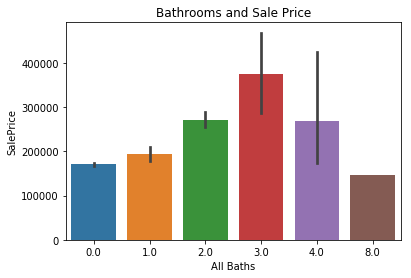

In [297]:
sns.barplot(df['All Baths'][:1500],df['SalePrice'])
plt.title('Bathrooms and Sale Price');

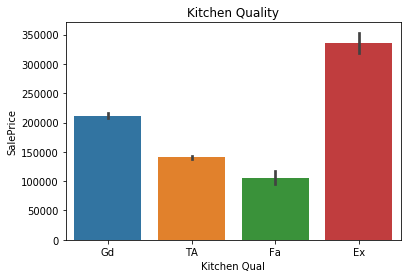

In [293]:
#Kitchen quality matters in sale price, TA has the most
sns.barplot(df['Kitchen Qual'],df['SalePrice'])
plt.title('Kitchen Quality');

In [120]:
df_with_dummies = pd.get_dummies(df, columns=['Fireplace Qu', 'Foundation','MS Zoning','Kitchen Qual'], drop_first=False)

In [122]:
#Using new dF with dummies. 
df_with_dummies.corr()['SalePrice'].sort_values(ascending=False)[:30]

SalePrice           1.000000
Overall Qual        0.797464
totalLivingSF       0.781714
Gr Liv Area         0.695185
Garage Area         0.648543
Garage Cars         0.645511
Total Bsmt SF       0.623746
1st Flr SF          0.616027
Year Built          0.564084
Kitchen Qual_Ex     0.553393
Year Remod/Add      0.542661
Full Bath           0.532360
Foundation_PConc    0.525073
Mas Vnr Area        0.501554
TotRms AbvGrd       0.501306
Fireplaces          0.464654
BsmtFin SF 1        0.418761
Fireplace Qu_Gd     0.380935
Open Porch SF       0.346460
Lot Frontage        0.331251
Wood Deck SF        0.321808
All Baths           0.312512
Lot Area            0.302148
Kitchen Qual_Gd     0.299910
Half Bath           0.278185
Bsmt Full Bath      0.277883
2nd Flr SF          0.246241
Fireplace Qu_Ex     0.235277
MS Zoning_RL        0.210048
Bsmt Unf SF         0.187682
Name: SalePrice, dtype: float64

### going for the mid

In [153]:
#drop all that doest corr well 
df_with_dummies.head()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Foundation_Stone,Foundation_Wood,MS Zoning_FV,MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Kitchen Qual_Ex,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_TA
0,109,533352170,60,69.0483,13517,Pave,IR1,Lvl,AllPub,CulDSac,...,0,0,0,0,1,0,0,0,1,0
1,544,531379050,60,43.0000,11492,Pave,IR1,Lvl,AllPub,CulDSac,...,0,0,0,0,1,0,0,0,1,0
2,153,535304180,20,68.0000,7922,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,1,0,0,0,1,0
3,318,916386060,60,73.0000,9802,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,1,0,0,0,0,1
4,255,906425045,50,82.0000,14235,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,1,0,0,0,0,1


In [124]:
# df_with_dummies['Mas Vnr Area'].replace(np.nan, 0.0, inplace=True)
df_with_dummies['Mas Vnr Area'].isnull().sum()

0

In [125]:
#had to clean up some Nan:
df_with_dummies['totalLivingSF'].fillna(0.0,inplace=True)
df_with_dummies['Garage Area'].fillna(0.0,inplace=True)
df_with_dummies['Garage Cars'].fillna(0.0,inplace=True)

In [185]:
features = ['Overall Qual', 'Gr Liv Area','totalLivingSF','Garage Area', 'Garage Cars','Foundation_PConc','Kitchen Qual_Ex','Fireplace Qu_Gd','Full Bath','Mas Vnr Area']

X = df_with_dummies[features]
y = df_with_dummies['SalePrice']
ylog = np.log(df['SalePrice'])

In [186]:
X_train,X_test, y_train,y_test= train_test_split(X,y, random_state=42)

In [187]:
ss= StandardScaler()
ss.fit(X_train)
X_train_s=ss.transform(X_train)
X_test_s=ss.transform(X_test)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [188]:
ss = StandardScaler()
ss.fit(X)
X_s = ss.transform(X)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [189]:
lr=LinearRegression()

In [190]:
(cross_val_score(lr,X_train_s,y_train, cv=10)

SyntaxError: unexpected EOF while parsing (<ipython-input-190-3e4a669f3d7d>, line 1)

In [165]:
lr.fit(X_train_s,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [166]:
print(lr.score(X_test_s,y_test))
print(lr.score(X_train_s,y_train))

0.8567024129245898
0.7979050928220421


In [167]:
lr.predict(X)

array([55622379.61741094, 74633769.06816402, 47689184.70090584, ...,
       66753990.66375198, 54175557.20743828, 66523218.29513997])

In [168]:
#finding optimal value for Lasso Regression
lcv=LassoCV(cv=3, max_iter=10000)

lcv.fit(X_train_s,y_train)

LassoCV(alphas=None, copy_X=True, cv=3, eps=0.001, fit_intercept=True,
    max_iter=10000, n_alphas=100, n_jobs=None, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [169]:
lcv.alpha_

288.2772818221789

In [170]:
print(max(lcv.alphas_))
print(min(lcv.alphas_))

62107.45763057996
62.10745763057999


In [171]:
# cross validate lass r^2 with the optimal alpha
cross_val_score(lcv, X_train_s,y_train, cv=10)

array([0.84939649, 0.80802082, 0.85776304, 0.84105895, 0.84518487,
       0.2858566 , 0.8186513 , 0.84075242, 0.64802707, 0.83163602])

In [172]:
print(lcv.score(X_test_s,y_test))
print(lcv.score(X_train_s,y_train))

0.8570354105881289
0.7978689493353283


In [173]:
coefs = pd.DataFrame({
    'variable':X.columns,
     'coef' :lcv.coef_
}).set_index('variable')

In [141]:
coefs

,coef
variable,
Overall Qual,24282.084894
Gr Liv Area,6516.357999
totalLivingSF,18447.006631
Garage Area,6456.043404
Garage Cars,6215.959191
Foundation_PConc,6530.983779
Kitchen Qual_Ex,13073.754753
Fireplace Qu_Gd,3949.106377
Full Bath,2887.268143


In [174]:
lcv.coef_

array([24282.08489402,  6516.35799913, 18447.0066313 ,  6456.0434035 ,
        6215.95919113,  6530.98377928, 13073.75475339,  3949.10637682,
        2887.26814311,  6604.47103832])

In [ ]:
np.exp(np.log(y_train)).hist()

In [175]:
test_s = ss.transform(test[features])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [157]:
test.isnull().sum()
test['Mas Vnr Type'].fillna(0, inplace=True)
test['Mas Vnr Area'].fillna(0, inplace=True)

In [176]:
preds = lr.predict(test_s)

In [178]:
preds[0:5]

array([171396.11547023, 189335.33730989, 195606.79207987, 122568.02630636,
       188829.35490115])

In [ ]:
to_submit = pd.DataFrame({
    'Id': test['Id'],
    'SalePrice': preds
})
to_submit.head()

In [ ]:
#to_submit.to_csv('submissions.csv', index=False)